<a href="https://www.kaggle.com/code/rahulkotecha/salary-classification?scriptVersionId=94742770" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Salary Dataset - Classification Problem

Extraction was done by Barry Becker from the 1994 Census database.
Prediction task is to determine whether a person makes over 50K a year.


Columns are:
age: continuous;
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked;
fnlwgt: continuous;
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool;
education-num: continuous;
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse;
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces;
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried;
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black;
sex: Female, Male;
capital-gain: continuous;
capital-loss: continuous;
hours-per-week: continuous;
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands'
salary: <=50K or >50K
Source: https://archive.ics.uci.edu/ml/datasets/Census+Income
Thumbnail: https://www.deskera.com/blog/net-salary/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("../input/salary-prediction-classification/salary.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

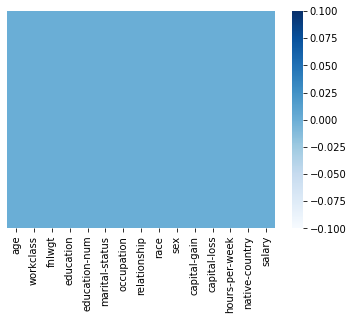

In [6]:
sns.heatmap(df.isna(),yticklabels=False,cmap="Blues")
plt.show()

In [7]:
for col in df:
    print(col)
    print(f"{df[col].value_counts().sort_index()}\n")

age
17    395
18    550
19    712
20    753
21    720
     ... 
85      3
86      1
87      1
88      3
90     43
Name: age, Length: 73, dtype: int64

workclass
 ?                    1836
 Federal-gov           960
 Local-gov            2093
 Never-worked            7
 Private             22696
 Self-emp-inc         1116
 Self-emp-not-inc     2541
 State-gov            1298
 Without-pay            14
Name: workclass, dtype: int64

fnlwgt
12285      1
13769      1
14878      1
18827      1
19214      1
          ..
1226583    1
1268339    1
1366120    1
1455435    1
1484705    1
Name: fnlwgt, Length: 21648, dtype: int64

education
 10th              933
 11th             1175
 12th              433
 1st-4th           168
 5th-6th           333
 7th-8th           646
 9th               514
 Assoc-acdm       1067
 Assoc-voc        1382
 Bachelors        5355
 Doctorate         413
 HS-grad         10501
 Masters          1723
 Preschool          51
 Prof-school       576
 Some-college    

In df, Columns--> "workclass", "occupation" and "native-country" contain Missing values represented by "?"


"workclass" has 1836 Missing values which is 5.6% of total-->Fillna(<3% to total records),

"occupation" has 1843 Missing values which is 5.6% of total--> Fillna(<3% to total records),

"native-country" has 583 Missing values which is 1.79% of total-->Drop records(<3% to total records)

In [8]:
df["native-country"]=df["native-country"].apply(lambda text : text.strip())

In [9]:
df["native-country"].replace("?",np.nan,inplace=True)

In [10]:
df.dropna(axis=0,subset=["native-country"],inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31978 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             31978 non-null  int64 
 1   workclass       31978 non-null  object
 2   fnlwgt          31978 non-null  int64 
 3   education       31978 non-null  object
 4   education-num   31978 non-null  int64 
 5   marital-status  31978 non-null  object
 6   occupation      31978 non-null  object
 7   relationship    31978 non-null  object
 8   race            31978 non-null  object
 9   sex             31978 non-null  object
 10  capital-gain    31978 non-null  int64 
 11  capital-loss    31978 non-null  int64 
 12  hours-per-week  31978 non-null  int64 
 13  native-country  31978 non-null  object
 14  salary          31978 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.9+ MB


In [12]:
df["workclass"]=df["workclass"].apply(lambda text : text.strip())

In [13]:
df["occupation"]=df["occupation"].apply(lambda text : text.strip())

In [14]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [15]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values="?", strategy="most_frequent")
df[['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary']]=si.fit_transform(df)

In [16]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
df_cat=df[['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary']]
df_num=df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week']]

In [18]:
df_cat.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [19]:
df_cat["workclass"].value_counts().sort_values()

Never-worked            7
Without-pay            14
Federal-gov           943
Self-emp-inc         1074
State-gov            1279
Local-gov            2067
Self-emp-not-inc     2499
Private             24095
Name: workclass, dtype: int64

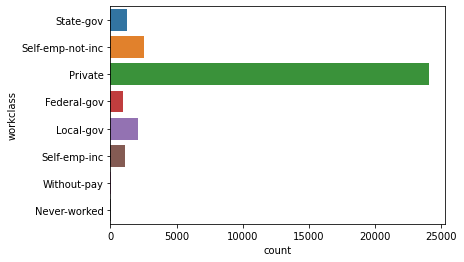

In [20]:
plt.figure()
sns.countplot(data=df_cat,y="workclass")
plt.show()

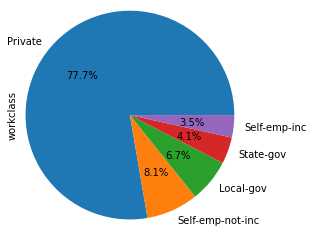

In [21]:
df_cat["workclass"].value_counts().head().plot(kind="pie",autopct="%.1f%%",radius=1.2)
plt.show()

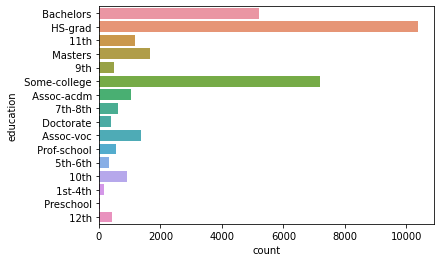

In [22]:
sns.countplot(data=df_cat,y="education")
plt.show()

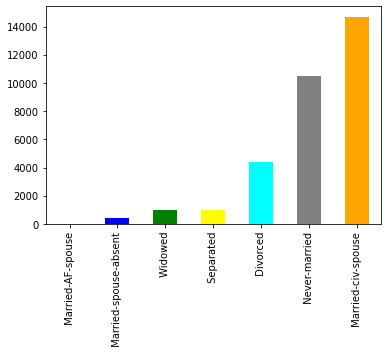

In [23]:
df_cat["marital-status"].value_counts().sort_values().plot(kind="bar",color=["red","blue","green","yellow","cyan","grey","orange"],width=0.5)
plt.show()

In [24]:
df["occupation"].nunique()

14

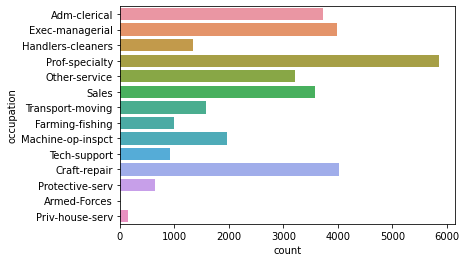

In [25]:
sns.countplot(data=df_cat,y="occupation")
plt.show()

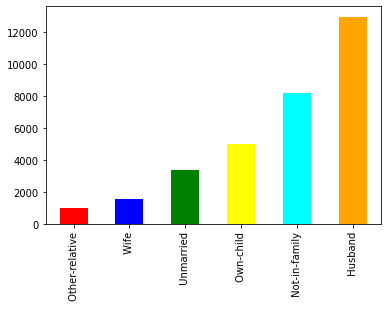

In [26]:
df_cat["relationship"].value_counts().sort_values().plot(kind="bar",color=["red","blue","green","yellow","cyan","orange"],width=0.5)
plt.show()

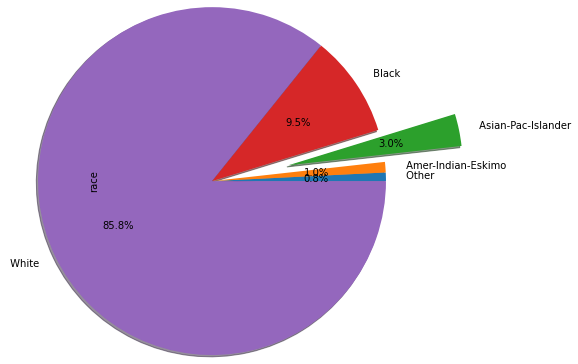

In [27]:
df_cat["race"].value_counts().sort_values().plot(kind="pie",autopct="%.1f%%",explode=[0,0,0.9,0,0],shadow=True,radius=2)
plt.show()

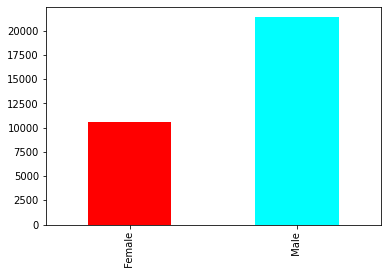

In [28]:
df_cat["sex"].value_counts().sort_values().plot(kind="bar",color=["red","cyan"])
plt.show()

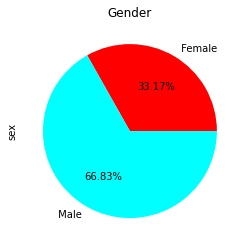

In [29]:
df_cat["sex"].value_counts().sort_values().plot(kind="pie",autopct="%.2f%%",colors=["red","cyan"])
plt.title("Gender")
plt.show()

In [30]:
df_cat["native-country"].nunique()

41

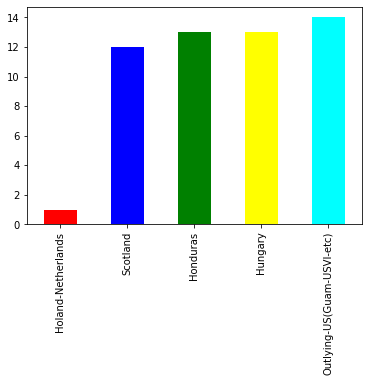

In [31]:
df_cat["native-country"].value_counts().sort_values().head().plot(kind="bar",color=["red","blue","green","yellow","cyan"])
plt.show()

In [32]:
df_cat["native-country"].value_counts().sort_values().tail()

Canada             121
Germany            137
Philippines        198
Mexico             643
United-States    29170
Name: native-country, dtype: int64

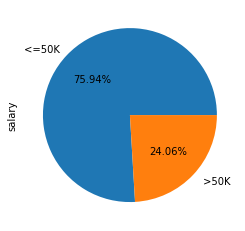

In [33]:
df_cat["salary"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

In [34]:
df_cat.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary'],
      dtype='object')

In [35]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df_cat[['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary']]=oe.fit_transform(df_cat)

In [36]:
df_cat.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,6.0,9.0,4.0,0.0,1.0,4.0,1.0,38.0,0.0
1,5.0,9.0,2.0,3.0,0.0,4.0,1.0,38.0,0.0
2,3.0,11.0,0.0,5.0,1.0,4.0,1.0,38.0,0.0
3,3.0,1.0,2.0,5.0,0.0,2.0,1.0,38.0,0.0
4,3.0,9.0,2.0,9.0,5.0,2.0,0.0,4.0,0.0


In [37]:
oe.categories_

[array(['Federal-gov', 'Local-gov', 'Never-worked', 'Private',
        'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
       dtype=object),
 array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
        ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
        ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
        ' Some-college'], dtype=object),
 array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
        ' Married-spouse-absent', ' Never-married', ' Separated',
        ' Widowed'], dtype=object),
 array(['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
        'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
        'Other-service', 'Priv-house-serv', 'Prof-specialty',
        'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving'],
       dtype=object),
 array([' Husband', ' Not-in-family', ' Other-relative', ' Own-child',
        ' Unmarried', ' Wife'], dtype=object),
 array([

In [38]:
df_num.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [39]:
from scipy.stats import skew

age
Skewness: 0.5569091975237709


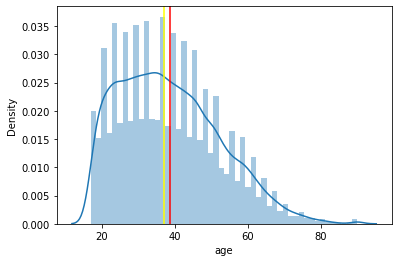

fnlwgt
Skewness: 1.44803964219022


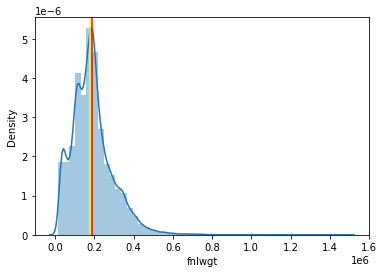

education-num
Skewness: -0.3071595568629495


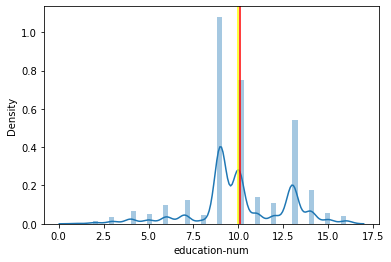

capital-gain
Skewness: 12.066475806764245


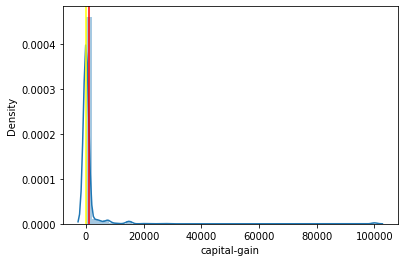

capital-loss
Skewness: 4.609247964407814


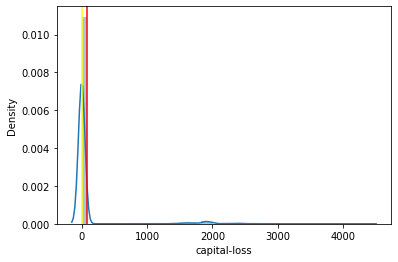

hours-per-week
Skewness: 0.2269448557391385


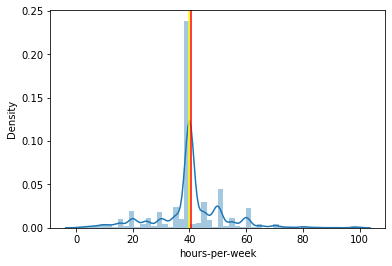

In [40]:
for col in df_num:
    print(col)
    print(f"Skewness: {skew(df[col])}")
    
    plt.figure()
    mwidth=df[col].mean()
    medwidth=df[col].median()
    sns.distplot(df[col])
    plt.axvline(mwidth,color="red")
    plt.axvline(medwidth,color="yellow")
    plt.show()

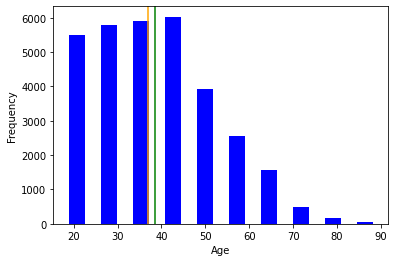

In [41]:
plt.hist(df_num["age"],bins=10,color="blue",histtype="bar",rwidth=0.5)
plt.xlabel("Age")
plt.ylabel("Frequency")
mwidth=df["age"].mean()
medwidth=df["age"].median()
plt.axvline(mwidth,color="green")
plt.axvline(medwidth,color="orange")
plt.show()

In [42]:
df_num.corr()

""


In [43]:
df=pd.concat([df_num,df_cat],axis=1)

In [44]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,39,77516,13,2174,0,40,6.0,9.0,4.0,0.0,1.0,4.0,1.0,38.0,0.0
1,50,83311,13,0,0,13,5.0,9.0,2.0,3.0,0.0,4.0,1.0,38.0,0.0
2,38,215646,9,0,0,40,3.0,11.0,0.0,5.0,1.0,4.0,1.0,38.0,0.0
3,53,234721,7,0,0,40,3.0,1.0,2.0,5.0,0.0,2.0,1.0,38.0,0.0
4,28,338409,13,0,0,40,3.0,9.0,2.0,9.0,5.0,2.0,0.0,4.0,0.0


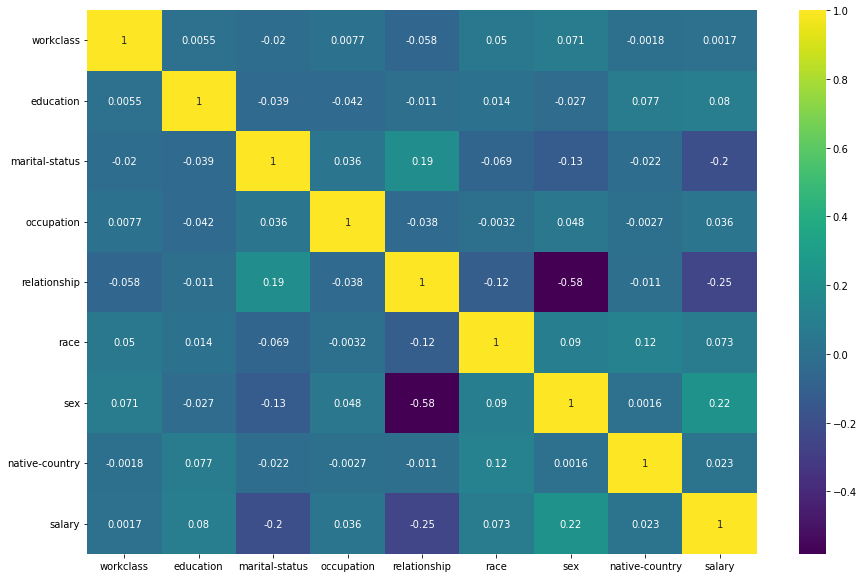

In [45]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.show()

In [46]:
df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'native-country',
       'salary'],
      dtype='object')

In [47]:
x1=df.iloc[ : , :-1]
x1.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39,77516,13,2174,0,40,6.0,9.0,4.0,0.0,1.0,4.0,1.0,38.0
1,50,83311,13,0,0,13,5.0,9.0,2.0,3.0,0.0,4.0,1.0,38.0
2,38,215646,9,0,0,40,3.0,11.0,0.0,5.0,1.0,4.0,1.0,38.0
3,53,234721,7,0,0,40,3.0,1.0,2.0,5.0,0.0,2.0,1.0,38.0
4,28,338409,13,0,0,40,3.0,9.0,2.0,9.0,5.0,2.0,0.0,4.0


In [48]:
y1=df.iloc[ : ,-1]
y1.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: salary, dtype: float64

In [49]:
from imblearn import over_sampling, under_sampling

In [50]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
x,y=ros.fit_resample(x1,y1)
print(x.shape)
print(y.shape)

(48566, 14)
(48566,)


In [51]:
x.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39,77516,13,2174,0,40,6.0,9.0,4.0,0.0,1.0,4.0,1.0,38.0
1,50,83311,13,0,0,13,5.0,9.0,2.0,3.0,0.0,4.0,1.0,38.0
2,38,215646,9,0,0,40,3.0,11.0,0.0,5.0,1.0,4.0,1.0,38.0
3,53,234721,7,0,0,40,3.0,1.0,2.0,5.0,0.0,2.0,1.0,38.0
4,28,338409,13,0,0,40,3.0,9.0,2.0,9.0,5.0,2.0,0.0,4.0


In [52]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: salary, dtype: float64

In [53]:
y.value_counts()

0.0    24283
1.0    24283
Name: salary, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [55]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.fit_transform(xtest)

In [56]:
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix

# KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [58]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82      7240
         1.0       0.80      0.88      0.84      7330

    accuracy                           0.83     14570
   macro avg       0.83      0.83      0.83     14570
weighted avg       0.83      0.83      0.83     14570



In [59]:
accuracy_score(ytest,ypred)

0.8269732326698696

In [60]:
confusion_matrix(ytest,ypred)

array([[5619, 1621],
       [ 900, 6430]])

#### Hyper-Parameter Tuning

In [61]:
accuracy=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)

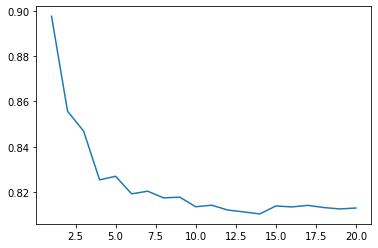

In [62]:
plt.plot(range(1,21),accuracy)
plt.show()

In [63]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [64]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82      7240
         1.0       0.80      0.88      0.84      7330

    accuracy                           0.83     14570
   macro avg       0.83      0.83      0.83     14570
weighted avg       0.83      0.83      0.83     14570



In [65]:
accuracy_score(ytest,ypred)

0.8269732326698696

In [66]:
confusion_matrix(ytest,ypred)

array([[5619, 1621],
       [ 900, 6430]])

#### Cross Validation Score

In [67]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(knn,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.7193741  0.72212499 0.75167302 0.73942139 0.7405539 ]
CVS Mean: 0.7346294785524712
CVS Standard Deviation: 0.012146046622390824


#### Bagging

In [68]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(knn)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [69]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.87      0.78      0.82      7240
         1.0       0.80      0.88      0.84      7330

    accuracy                           0.83     14570
   macro avg       0.84      0.83      0.83     14570
weighted avg       0.84      0.83      0.83     14570



In [70]:
accuracy_score(ytest,ypred)

0.8336993822923816

In [71]:
confusion_matrix(ytest,ypred)

array([[5670, 1570],
       [ 853, 6477]])

# Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [73]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.76      0.77      0.77      7240
         1.0       0.77      0.77      0.77      7330

    accuracy                           0.77     14570
   macro avg       0.77      0.77      0.77     14570
weighted avg       0.77      0.77      0.77     14570



In [74]:
accuracy_score(ytest,ypred)

0.7667810569663692

In [75]:
confusion_matrix(ytest,ypred)

array([[5564, 1676],
       [1722, 5608]])

#### Hyper-Parameter Tuning

In [76]:
params={
    "C": np.logspace(-3,3,7),
    "solver": ["liblinear","lbfgs","sag","saga","newton-cg"],
    "penalty": ["1","l2","elasticnet"]
}

In [77]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(logreg,params,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END C=0.001, penalty=1, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, penalty=1, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, penalty=1, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, penalty=1, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, penalty=1, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END ....C=0.001, penalty=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....C=0.001, penalty=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ....C=0.001, penalty=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ....C=0.001, penalty=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ....C=0.001, penalty=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END ......C=0.001, penalty=1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END ......C=0.001, penalty=1, solver=

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs', 'sag', 'saga',
                                    'newton-cg']},
             verbose=3)

In [78]:
grid.best_score_

0.7745914321310228

In [79]:
grid.best_estimator_

LogisticRegression(C=0.01, solver='liblinear')

In [80]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [81]:
print('Best C:', grid.best_estimator_.get_params()['C'])
print('Best solver:', grid.best_estimator_.get_params()['solver'])
print('Best penalty:', grid.best_estimator_.get_params()['penalty'])

Best C: 0.01
Best solver: liblinear
Best penalty: l2


In [82]:
logreg=grid.best_estimator_
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [83]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.77      0.76      0.76      7240
         1.0       0.77      0.77      0.77      7330

    accuracy                           0.77     14570
   macro avg       0.77      0.77      0.77     14570
weighted avg       0.77      0.77      0.77     14570



In [84]:
accuracy_score(ytest,ypred)

0.7658888126286891

#### Cross Validation Score

In [85]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(logreg,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.73831583 0.75743848 0.75476166 0.7396273  0.74889324]
CVS Mean: 0.7478073032877006
CVS Standard Deviation: 0.007736955211268212


#### Bagging

In [86]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(logreg)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [87]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.77      0.76      0.76      7240
         1.0       0.77      0.77      0.77      7330

    accuracy                           0.77     14570
   macro avg       0.77      0.77      0.77     14570
weighted avg       0.77      0.77      0.77     14570



In [88]:
accuracy_score(ytest,ypred)

0.7660947151681538

In [89]:
confusion_matrix(ytest,ypred)

array([[5522, 1718],
       [1690, 5640]])

# Naive Bayes 

In [90]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(xtrain,ytrain)
ypred=nb.predict(xtest)

In [91]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.64      0.92      0.75      7240
         1.0       0.86      0.48      0.62      7330

    accuracy                           0.70     14570
   macro avg       0.75      0.70      0.68     14570
weighted avg       0.75      0.70      0.68     14570



In [92]:
accuracy_score(ytest,ypred)

0.6988332189430336

In [93]:
confusion_matrix(ytest,ypred)

array([[6674,  566],
       [3822, 3508]])

#### Cross Validation Score

In [94]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(nb,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.62806259 0.62874498 0.63759909 0.62637702 0.62678884]
CVS Mean: 0.6295145050429307
CVS Standard Deviation: 0.004131195077957909


# Decision Tree 

In [95]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [96]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.85      0.87      7240
         1.0       0.86      0.91      0.88      7330

    accuracy                           0.88     14570
   macro avg       0.88      0.88      0.88     14570
weighted avg       0.88      0.88      0.88     14570



In [97]:
accuracy_score(ytest,ypred)

0.877076183939602

In [98]:
confusion_matrix(ytest,ypred)

array([[6121, 1119],
       [ 672, 6658]])

#### Hyper-Parameter Tuning

Criterion-"GINI"

In [99]:
s=0
for i in range(1,51):
    dt=DecisionTreeClassifier(criterion="gini",max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.8787920384351408 43


In [100]:
s=0
for i in range(1,51):
    dt=DecisionTreeClassifier(criterion="gini",min_samples_leaf=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.878586135895676 1


Criterion-"ENTROPY"

In [101]:
s=0
for i in range(1,51):
    dt=DecisionTreeClassifier(criterion="entropy",max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.8761839396019218 41


In [102]:
s=0
for i in range(1,51):
    dt=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.8743308167467398 1


Summary:

Criterion-"GINI"
    - Max depth Tuning: 87.70%,
    - Min samples leaf Tuning: 87.59%
        

Criterion-"ENTROPY"
    - Max depth Tuning: 87.48%,
    - Min samples leaf Tuning: 87.34%

In [103]:
dt=DecisionTreeClassifier(criterion="gini",max_depth=38)
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [104]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.85      0.87      7240
         1.0       0.86      0.91      0.88      7330

    accuracy                           0.88     14570
   macro avg       0.88      0.88      0.88     14570
weighted avg       0.88      0.88      0.88     14570



In [105]:
accuracy_score(ytest,ypred)

0.8768702814001372

In [106]:
confusion_matrix(ytest,ypred)

array([[6119, 1121],
       [ 673, 6657]])

#### Cross Validation Score

In [107]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(dt,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.90704138 0.91228251 0.92638732 0.93482961 0.92607845]
CVS Mean: 0.9213238537756909
CVS Standard Deviation: 0.01016253102604117


#### Bagging

In [108]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(dt)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [109]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.91      0.88      0.90      7240
         1.0       0.89      0.92      0.90      7330

    accuracy                           0.90     14570
   macro avg       0.90      0.90      0.90     14570
weighted avg       0.90      0.90      0.90     14570



In [110]:
accuracy_score(ytest,ypred)

0.8995881949210707

In [111]:
confusion_matrix(ytest,ypred)

array([[6371,  869],
       [ 594, 6736]])

# Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

In [113]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91      7240
         1.0       0.89      0.95      0.92      7330

    accuracy                           0.91     14570
   macro avg       0.92      0.91      0.91     14570
weighted avg       0.92      0.91      0.91     14570



In [114]:
confusion_matrix(ytest,ypred)

array([[6355,  885],
       [ 366, 6964]])

In [115]:
accuracy_score(ytest,ypred)

0.9141386410432395

#### Cross Validation Score

In [116]:
cvs=cross_val_score(rf,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.92464484 0.93174097 0.9400803  0.945331   0.94131576]
CVS Mean: 0.936622575005817
CVS Standard Deviation: 0.007444659139805758


# Support Vector Classifier

Kernel-"rbf"

In [117]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [118]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.87      0.78      0.82      7240
         1.0       0.80      0.88      0.84      7330

    accuracy                           0.83     14570
   macro avg       0.83      0.83      0.83     14570
weighted avg       0.83      0.83      0.83     14570



In [119]:
accuracy_score(ytest,ypred)

0.8306794783802334

In [120]:
confusion_matrix(ytest,ypred)

array([[5624, 1616],
       [ 851, 6479]])

Kernel-"linear"

In [121]:
from sklearn.svm import SVC
svc=SVC(kernel="linear")
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [122]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77      7240
         1.0       0.77      0.78      0.78      7330

    accuracy                           0.77     14570
   macro avg       0.77      0.77      0.77     14570
weighted avg       0.77      0.77      0.77     14570



In [123]:
accuracy_score(ytest,ypred)

0.7717913520933425

In [124]:
confusion_matrix(ytest,ypred)

array([[5501, 1739],
       [1586, 5744]])

#### Hyper-Parameter Tuning

In [125]:
params={
    "C": np.logspace(-3,3,7),
    "kernel": ["rbf"]
}

In [126]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(svc,params,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ...............C=0.001, kernel=rbf;, score=0.730 total time=  54.1s
[CV 2/5] END ...............C=0.001, kernel=rbf;, score=0.745 total time=  54.3s
[CV 3/5] END ...............C=0.001, kernel=rbf;, score=0.737 total time=  54.1s
[CV 4/5] END ...............C=0.001, kernel=rbf;, score=0.741 total time=  53.9s
[CV 5/5] END ...............C=0.001, kernel=rbf;, score=0.740 total time=  54.0s
[CV 1/5] END ................C=0.01, kernel=rbf;, score=0.789 total time=  39.1s
[CV 2/5] END ................C=0.01, kernel=rbf;, score=0.798 total time=  39.8s
[CV 3/5] END ................C=0.01, kernel=rbf;, score=0.785 total time=  39.4s
[CV 4/5] END ................C=0.01, kernel=rbf;, score=0.792 total time=  39.5s
[CV 5/5] END ................C=0.01, kernel=rbf;, score=0.793 total time=  39.3s
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.814 total time=  31.0s
[CV 2/5] END .................C=0.1, kernel=rbf;,

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'kernel': ['rbf']},
             verbose=3)

In [127]:
grid.best_params_

{'C': 1000.0, 'kernel': 'rbf'}

In [128]:
grid.best_score_

0.8535121168337904

In [129]:
grid.best_estimator_

SVC(C=1000.0)

In [130]:
print('Best C:', grid.best_estimator_.get_params()['C'])
print('Best gamma:', grid.best_estimator_.get_params()['gamma'])
print('Best kernel:', grid.best_estimator_.get_params()['kernel'])

Best C: 1000.0
Best gamma: scale
Best kernel: rbf


In [131]:
svc=grid.best_estimator_
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [132]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.91      0.79      0.84      7240
         1.0       0.81      0.92      0.86      7330

    accuracy                           0.85     14570
   macro avg       0.86      0.85      0.85     14570
weighted avg       0.86      0.85      0.85     14570



In [133]:
accuracy_score(ytest,ypred)

0.8543582704186685

In [134]:
confusion_matrix(ytest,ypred)

array([[5695, 1545],
       [ 577, 6753]])

#### Cross Validation Score

In [135]:
cvs=cross_val_score(svc,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.62775376 0.62781839 0.63656955 0.62452383 0.62565634]
CVS Mean: 0.6284643724131069
CVS Standard Deviation: 0.004243324510647128


#### Bagging

In [136]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(svc)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [137]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85      7240
         1.0       0.82      0.91      0.86      7330

    accuracy                           0.86     14570
   macro avg       0.86      0.86      0.86     14570
weighted avg       0.86      0.86      0.86     14570



In [138]:
accuracy_score(ytest,ypred)

0.8561427590940288

In [139]:
confusion_matrix(ytest,ypred)

array([[5772, 1468],
       [ 628, 6702]])

# Voting Classifier

In [140]:
models=[]
models.append(("KNN",KNeighborsClassifier())),
models.append(("Logistic Regression",LogisticRegression())),
models.append(("Naive Bayes",GaussianNB())),
models.append(("Decision Tree",DecisionTreeClassifier())),
models.append(("Random Forest",RandomForestClassifier())),
models.append(("Support Vector Classifier",SVC()))

In [141]:
from sklearn.ensemble import VotingClassifier
vt=VotingClassifier(estimators=models)
vt.fit(xtrain,ytrain)
ypred=vt.predict(xtest)

In [142]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      7240
         1.0       0.88      0.86      0.87      7330

    accuracy                           0.87     14570
   macro avg       0.87      0.87      0.87     14570
weighted avg       0.87      0.87      0.87     14570



In [143]:
accuracy_score(ytest,ypred)

0.8673301304049417

In [144]:
confusion_matrix(ytest,ypred)

array([[6368,  872],
       [1061, 6269]])

# Boosting

###### Ada Boosting

In [145]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(xtrain,ytrain)
ypred=abc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82      7240
         1.0       0.82      0.83      0.83      7330

    accuracy                           0.82     14570
   macro avg       0.82      0.82      0.82     14570
weighted avg       0.82      0.82      0.82     14570



In [146]:
accuracy_score(ytest,ypred)

0.8229238160603981

In [147]:
confusion_matrix(ytest,ypred)

array([[5873, 1367],
       [1213, 6117]])

###### Gradient Boosting

In [148]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
ypred=gbc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.83      7240
         1.0       0.82      0.85      0.84      7330

    accuracy                           0.83     14570
   macro avg       0.83      0.83      0.83     14570
weighted avg       0.83      0.83      0.83     14570



In [149]:
accuracy_score(ytest,ypred)

0.8327385037748799

In [150]:
confusion_matrix(ytest,ypred)

array([[5890, 1350],
       [1087, 6243]])

###### XG Boosting

In [151]:
from xgboost import XGBClassifier
xgbc=XGBClassifier()
xgbc.fit(xtrain,ytrain)
ypred=xgbc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      7240
         1.0       0.85      0.86      0.85      7330

    accuracy                           0.85     14570
   macro avg       0.85      0.85      0.85     14570
weighted avg       0.85      0.85      0.85     14570



In [152]:
accuracy_score(ytest,ypred)

0.8509265614275909

In [153]:
confusion_matrix(ytest,ypred)

array([[6100, 1140],
       [1032, 6298]])